This notebook shows how to open a bioformats series in python.  Images shared by João Mamede 


In [51]:
import tnia.io.bioformats_helper as bfh
import bioformats as bf
from tnia.plotting.projections import show_xyz_max

In [4]:
# start the jvm.  This cell should only be run once
bfh.start_jvm()

In [5]:
filename='D:\\images\\From Joao Mamede\\F2_laminigfpcarub8am.nd2'

In [55]:
# get the meta data as a string
meta_str=bioformats.get_omexml_metadata(filename)
print(type(meta_str))
# convert to an object
o=bioformats.OMEXML(meta_str)
print(type(o))

<class 'str'>
<class 'bioformats.omexml.OMEXML'>


In [8]:
# now we can get the image count and loop through all the images
ni = o.get_image_count()
for i in range(ni):
    nz=o.image(i).Pixels.SizeZ
    print(nz)

23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23


In [56]:
# we can use the meta data object to get individual meta data for example pixel sizes of the image at index 2
print(o.image(2).Pixels.get_PhysicalSizeX())
print(o.image(2).Pixels.get_PhysicalSizeY())
print(o.image(2).Pixels.get_PhysicalSizeZ())

0.216666666666667
0.216666666666667
0.5


In [57]:
# if we want to load image data use load_image, let's get help on it first
help(bioformats.load_image)

Help on function load_using_bioformats in module bioformats.formatreader:

load_using_bioformats(path, c=None, z=0, t=0, series=None, index=None, rescale=True, wants_max_intensity=False, channel_names=None)
    Load the given image file using the Bioformats library.
    
    :param path: path to the file
    :param z: the frame index in the `z` (depth) dimension.
    :param t: the frame index in the time dimension.
    :param channel_names: `None` if you don't want them, a list which will be filled if you do.
    
    :returns: either a 2-d (grayscale) or 3-d (2-d + 3 RGB planes) image.



In [58]:
# load image at z=0, channel=0 and series = 5
img=bf.load_image(filename, z=0,c=0,series=5, rescale=False)

In [59]:
img.shape

(1024, 1024)

In [60]:
# I've written a helper function to load an entire volume, here we get the 3D volume at channel 2, series = 11
img, sx, sy, sz = bfh.load_volume(filename, 2,11)

In [61]:
print(img.shape, sx, sy, sz)

(23, 1024, 1024) 0.216666666666667 0.216666666666667 0.5


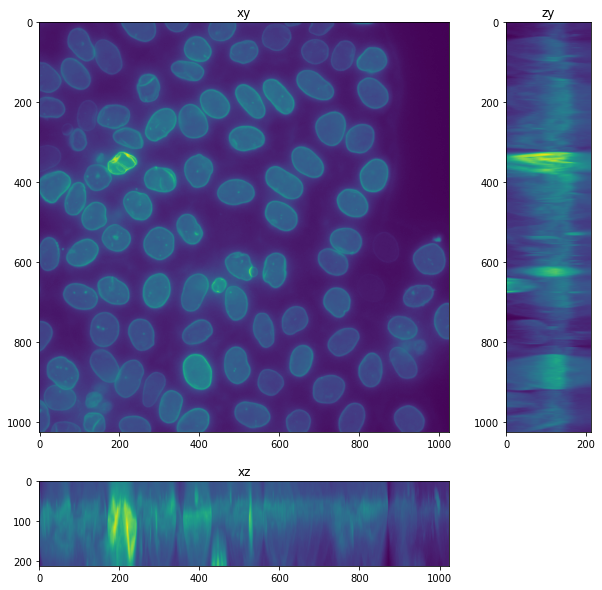

In [62]:
# here I call another helper function to generate and show max projections in each dimension, I exagerate the z scaling so 
# I can see the z detail better
fig=show_xyz_max(img, sxy=sx, sz=2)

In [66]:
# get a different channel and series number
img2, sx, sy, sz = bfh.load_volume(filename, 0,14)

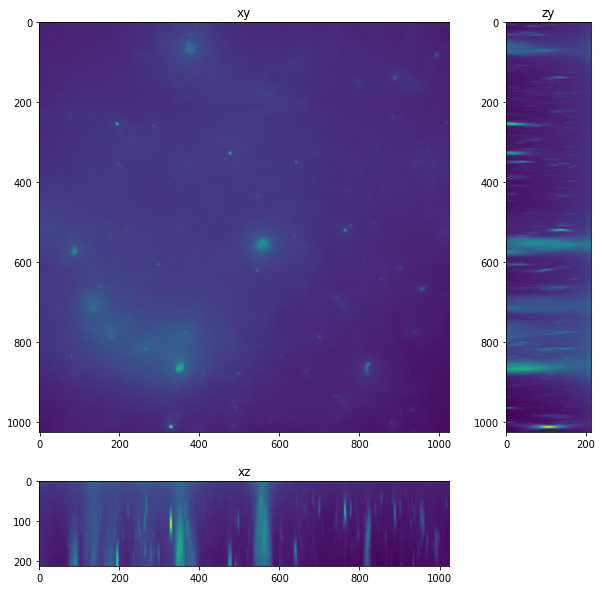

In [67]:
fig=show_xyz_max(img2,sxy=sx, sz=2)